---

title: 双样本 T 检测
date: 2024-10-22
author: 郝鸿涛
slug: 2-sample-t
draft: false
toc: true
tags: 统计学

---

## 配对样本

我们首先来看配对样本检测。为了检测一个药物的作用，我们测量了患者服药前的血压 ($X_1$)，以及服药后的血压 ($X_2$).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
# 此例取自 Chelsey Green 老师教的 STAT 571 at UW-Madison, 2024Fall
X1 = np.array([90, 100, 92, 96, 96, 96, 92, 98, 102, 94, 94, 102, 94, 88, 104])
X2 = np.array([88, 92, 82, 90, 78, 86, 88, 72, 84, 102, 94, 70, 94, 92, 94])
data = {
    "Subject": range(1, 16),
    "Before (X1)": X1,
    "After (X2)": X2
}
# Creating a DataFrame
df = pd.DataFrame(data)
df

,Subject,Before (X1),After (X2)
0,1,90,88
1,2,100,92
2,3,92,82
3,4,96,90
4,5,96,78
5,6,96,86
6,7,92,88
7,8,98,72
8,9,102,84
9,10,94,102


现在问题来了：请问这个药对于改变病人的血压有效果吗？

上面我们只是对 15 名患者进行实验，现在想象我们对无数患者实验，这些无数患者在服药前血压的均值为 $\mu_1$，标准差为 $\sigma_1$，服药后血压均值为 $\mu_2$，标准差为 $\sigma_2$。我们假设一个群体中所有人的血压分布服从正态分布。

我们假设这款药对于改变病人的血压无效，也即 $H_0: \mu_1 = \mu_2$，$H_A: \mu_1 \ne \mu_2$。

这里有一点没有说明，如果药物无效，那么病人服药前后血压其实是来自一个母体，所以 $\sigma_1 = \sigma2$

我们把患者 $i$ 服药前后血压差记为 $D_i$。

$$D_i = X_{1 i} - X_{2 i}$$

如果 $H_0: \mu_1 = \mu_2$ 成立，那么 $\mathbb{E} (D)$ 该是什么？

如果 $H_0$ 成立，我们知道 $\mu_1 = \mu_2$ 并且 $\sigma_1 = \sigma_2$，那么就相当于**从同一个正态分布每次取两个数，算出这两个数的差，重复无数次**。

下面我们模拟一下：

In [3]:
def obtain_mean_diff(mean, std_dev, size):
    data1 = np.random.normal(mean, std_dev, size)
    data2 = np.random.normal(mean, std_dev, size)
    mean_diff = np.mean(data1 - data2)
    return mean_diff

mean_diffs = []
mean = 100       
std_dev = 15
size = 10
for _ in range(100000):
    mean_diff = obtain_mean_diff(mean, std_dev, size)
    mean_diffs.append(mean_diff)

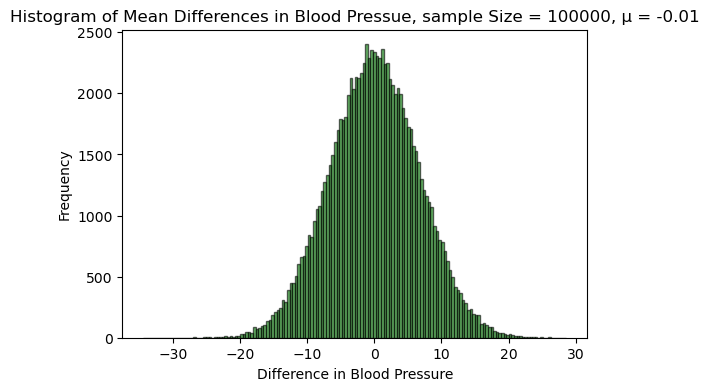

In [4]:
plt.figure(figsize=(6, 4))
plt.hist(mean_diffs, bins="auto", density=False, alpha=0.6, color='g', edgecolor='black')
# Add titles and labels
plt.title(f"Histogram of Mean Differences in Blood Pressue, sample Size = {len(mean_diffs)}, "\
          f"μ = {np.mean(mean_diffs):.2f}")
plt.xlabel('Difference in Blood Pressure')
plt.ylabel('Frequency')
plt.show()

我们看到 $\mathbb{E}(D) = 0$，这应该很好理解，即使没有上面的模拟。

回到我们最初的问题：这款药到底有没有效。我们通过上面的模拟，知道了总体 $D$ 是一个均值为 0 的正态分布。若 $H_0$ 成立，则相当于我们从总体 $D$ 中随机抽取了 15 个数（即，15 名患者服药前后血压差）。按照[中心极限定理](/cn/2024/09/24/clt/)，这 15 个数的平均值「应该」离 0 不远。具体有多远，我们使用 Z 分数看一下就知道了，但我们并不知道母体 $D$ 的标准差为何，所以只能用样本标准差来估计，这就转换成了一个很典型的单样本 T 检验问题，我们[之前讲过](/cn/2024/09/29/t/)。

$$t = \frac{\bar{D} - \mathbb{E}(D)}{\frac{S_D}{\sqrt{15}}}$$

In [5]:
d = X1 - X2
d_bar = np.mean(d)
s_d = np.std(d, ddof=1)
t_value = d_bar / (s_d/np.sqrt(len(X1)))
df = len(X1) - 1
p_value = 2*(1 - t.cdf(abs(t_value), df = df))
p_value

0.007749436106654128

我们看到 $p$ 值 小于 0.01。这表示如果 $H_0$ 成立，那么我们观测到 $X_1$ 和 $X_2$ 这次结果的概率小于 0.01，所以我们有理由拒绝这个陈述：该药物无效。

换成人话就是，如果该药物无效，这次实验结果出现的概率很低。所以我们拒绝承认该药物无效这个说法。

## 独立样本

### 方差相等

看完配对样本，我们再来看一下独立样本。

为了检测一款药物的疗效，我们让第一组 15 名患者服用该药物并测量了血压 ($X_1$)，让第二组 10 名患者服用安慰剂并测量了血压 ($X_2$)。

In [6]:
X1 = np.array([90, 100, 92, 96, 96, 96, 92, 98, 102, 94, 94, 102, 94, 88, 104])
X2 = np.array([88, 92, 82, 90, 78, 86, 88, 72, 84, 102])

请问：该药物对于改变病人血压是否有效？

这次的观察结果和配对样本的不同在于，在这次的独立样本中，我们无法使用 $D_i = X_{1 i} - X_{2 i}$ 这个概念，因为并不存在两两对应的这一情况。

上面我们只是对 15 名和 10 名患者进行实验，现在想象有无数的患者服用该药物后的血压的均值为 $\mu_1$，标准差为 $\sigma_1$。有无数的患者服用安慰剂后的血压均值为 $\mu_2$，标准差为 $\sigma_2$。

我们把上面这句话换成更专业的语言。

有两组独立样本：

样本 $X_1$：$X_1, X_2 ... X_{n_1}$ 来自总体 $\mathcal{N} (\mu_1, \sigma_1)$

样本 $X_2$：$Y_1, Y_2 ... Y_{n_2}$ 来自总体 $\mathcal{N} (\mu_2, \sigma_2)$

我们假设服用该药物的母体和服用安慰剂的母体，血压标准差一样，也就是说 $\sigma_1 = \sigma_2 = \sigma$。

根据[中心极限定理](/cn/2024/09/24/clt/)，我们知道

$$\bar{X_1} \sim \mathcal{N}\left(\mu_1, \frac{\sigma^2}{n_1} \right)$$

$$\bar{X_2} \sim \mathcal{N}\left(\mu_2, \frac{\sigma^2}{n_2} \right)$$

我们进一步知道：

$$\bar{X_1} - \bar{X_2} \sim \mathcal{N}\left(\mu_1 - \mu_2,  \frac{\sigma^2}{n_1} + \frac{\sigma^2}{n_2}\right)$$

这一点我现在懒得证明，感兴趣的朋友自己用代码模拟一下就知道了。

我们假设这款药对于改变病人的血压无效，也即 $H_0: \mu_1 = \mu_2$，$H_A: \mu_1 \ne \mu_2$。

所以

$$\bar{X_1} - \bar{X_2} \sim \mathcal{N}\left(0,  \frac{\sigma^2}{n_1} + \frac{\sigma^2}{n_2}\right)$$

转换成 $Z$ 分数：

$$Z = \frac{\bar{X_1} - \bar{X_2}}{\sigma \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \sim \mathcal{N}(0, 1)$$

$t$ 分布的含义是说，在 $Z$ 分布中，当我们用样本方差来估计总体方差时，得出来的 $Z$ 服从 $t$ 分布。现在的问题是，如何得到样本方差。

我们知道样本 1 和样本 2 的方差分别为：

$$s_1^2 = \frac{1}{n_1 - 1}\sum_{i = 1}^{n_1}\left(X_{i} -  \bar{X_1}\right)$$

$$s_2^2 = \frac{1}{n_2 - 1}\sum_{i = 1}^{n_2}\left(Y_{i} -  \bar{X_2}\right)$$

我们这样计算 $X_1 - X_2$ 的方差：

$$S_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$

把 $\sigma$ 和 $S_p$ 对调一下，我们现在想证明的是：

$$\frac{\bar{X_1} - \bar{X_2}}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \sim t_{n_1 + n_2 - 2}$$

那我们来证明一下。

首先，根据[卡方分布的知识](/cn/2024/09/29/chi2/)，我们知道

$$\frac{(n_1 - 1)s_1^2}{\sigma^2} \sim \chi_{n_1 - 1}^2$$

$$\frac{(n_2 - 1)s_2^2}{\sigma^2} \sim \chi_{n_2 - 1}^2$$

卡方分布有一个性质：如果两个独立随机变量的分布服从卡方分布，那么这两个随机变量之和也服从卡方分布，且自由度是这两个卡方分布自由度之和。所以

$$\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{\sigma^2} \sim \chi_{n_1 + n_2 - 2}^2$$

所以

$$S_p^2 \sim \frac{\sigma^2}{n_1 + n_2 - 2} \chi_{n_1 + n_2 - 2}^2$$

所以

$$S_p = \sigma \sqrt{\frac{\chi_{n_1 + n_2 - 2}^2}{n_1 + n_2 - 2}}$$


我们把上面这个公式以及

$$\bar{X_1} - \bar{X_2} = Z \cdot \sigma \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$$

代入

$$\frac{\bar{X_1} - \bar{X_2}}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

得到

$$\frac{\bar{X_1} - \bar{X_2}}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} = \frac{Z}{\sqrt{\frac{\chi_{n_1 + n_2 - 2}^2}{n_1 + n_2 - 2}}}$$

这个结果和我们在 [t 分布](/cn/2024/09/29/t/) 讲的一样，所以

$$\frac{\bar{X_1} - \bar{X_2}}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \sim t_{n_1 + n_2 - 2}$$

得证。

### 方差不等

同样的问题，如果我们无法确定两个总体的方差相等，那么

$$\bar{X_1} - \bar{X_2} \sim \mathcal{N}\left(\mu_1 - \mu_2,  \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}\right)$$

若 $H_0$ 成立：

$$\bar{X_1} - \bar{X_2} \sim \mathcal{N}\left(0,  \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}\right)$$

所以

$$T = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

这样算出来的 $T$ 并不符合 $t_{n_1 + n_2 - 2}$。统计量 $T$ 只是近似服从 t 分布，自由度计算方法如下：

$$\frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_1}\right)^2}{\frac{1}{n_1 - 1}\left(\frac{s_1^2}{n_1}\right)^2 + \frac{1}{n_2 - 1}\left(\frac{s_2^2}{n_2}\right)^2}$$

这被称为 [Welch's t test](https://en.wikipedia.org/wiki/Welch%27s_t-test)。